In [1]:
# Ignore warning message
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import plotnine as pl # for ploting

In [3]:
# Linear Regression Machine learning algorithm
from sklearn.linear_model import LinearRegression as LR

In [4]:
def predicted_line(X, y):
    _model = LR()
    _model.fit(X, y)
    return X.flatten() * _model.coef_[0] + _model.intercept_

In [5]:
# Read dataset
with open("./ex1data2.txt") as _f:
    data = [list(map(int, i.strip().split(','))) for i in _f.readlines()]

In [6]:
# Create DataFrame
df = pd.DataFrame(data, columns=["size", "bedrooms", "prices"], )

In [7]:
# Average area and price by number of bedrooms
(
    df
    .groupby("bedrooms")["prices"]
    .agg(["mean", "size"])
    .rename(columns={"size": "count", "mean": "avg prices"})
)

,avg prices,count
bedrooms,,
1,169900.000000,1
2,280866.666667,6
3,326403.920000,25
4,377449.785714,14
5,699900.000000,1


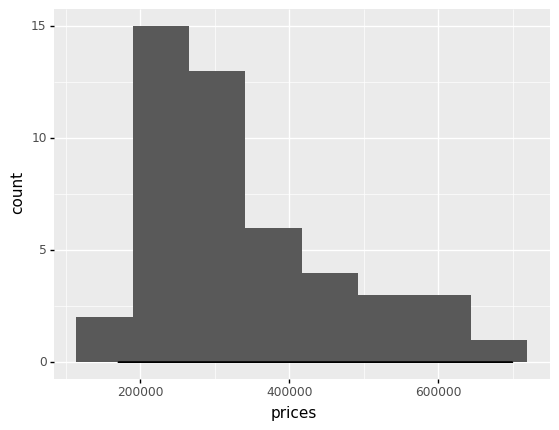

<ggplot: (8773500822245)>

In [37]:
(
    pl.ggplot(df, pl.aes("prices"))
    + pl.geom_histogram()
    + pl.geom_density()
)

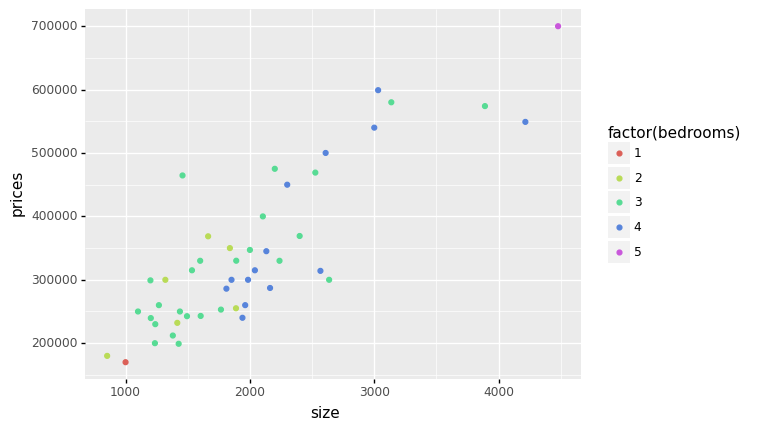

<ggplot: (8773501033671)>

In [42]:
(
    pl.ggplot(df)
    + pl.geom_point(pl.aes("size", "prices",
                           color="factor(bedrooms)"))
)

## LR - size vs prices

In [9]:
X = df["size"].values.reshape(-1,1)
y = df["prices"].values

In [10]:
# Predicted values
df["predicted_price_by_size"] = predicted_line(X, y)

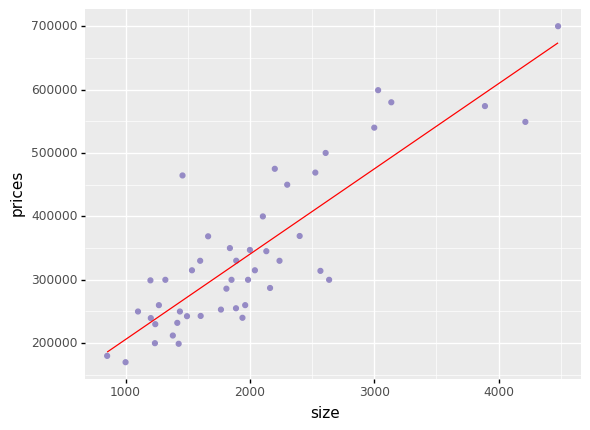

<ggplot: (8773505392625)>

In [11]:
(
    pl.ggplot(df)
    + pl.geom_point(pl.aes("size", "prices"), color="#958AC5")
    + pl.geom_line(pl.aes("size", "predicted_price_by_size"), color="red")
)

## **LR - number of bedrooms vs prices**

In [12]:
X = df["bedrooms"].values.reshape(-1,1)
y = df["prices"].values

In [13]:
# Predicted values
df["predicted_price_by_bedrooms"] = predicted_line(X, y)

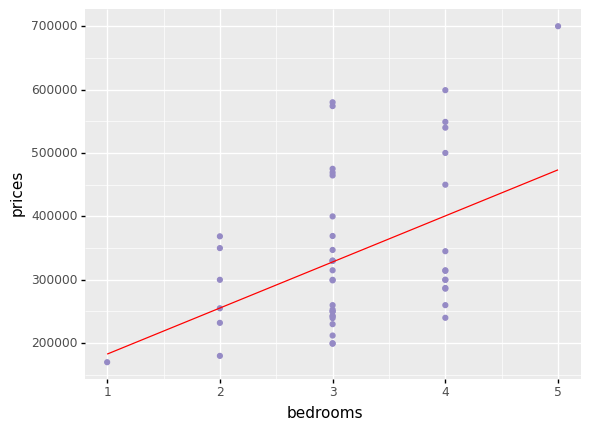

<ggplot: (8773503059535)>

In [14]:
(
    pl.ggplot(df)
    + pl.geom_point(pl.aes("bedrooms", "prices"), color="#958AC5")
    + pl.geom_line(pl.aes("bedrooms", "predicted_price_by_bedrooms"), color="red")
)

## **Separate LR model for each number of bedrooms data**

In [15]:
df["predicted_by_bedrooms"] = 0

In [16]:
for v in df.groupby("bedrooms").groups.values():
    _df = df.iloc[v]
    _X, _y = _df["size"].values.reshape(-1, 1), _df["prices"].values
    df["predicted_by_bedrooms"].loc[v] = predicted_line(_X, _y)

**Regression Line for each number of bedrooms data**

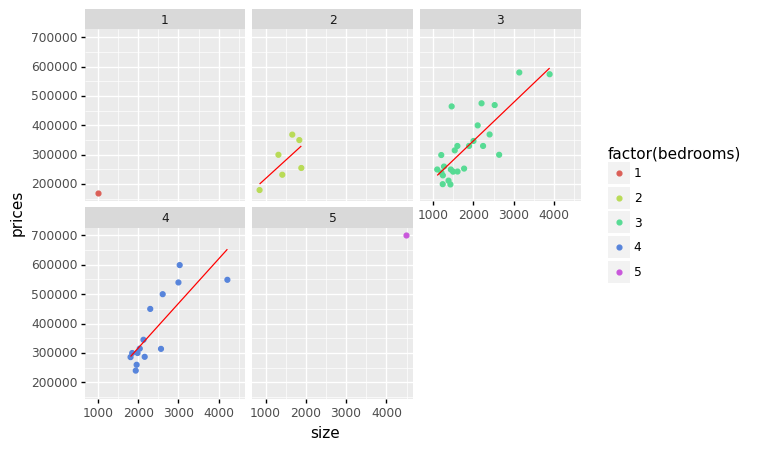

<ggplot: (8773503002853)>

In [17]:
(
    pl.ggplot(df)
    + pl.geom_point(pl.aes("size", "prices", color='factor(bedrooms)'))
    + pl.geom_line(pl.aes("size", "predicted_by_bedrooms"), color="red")
    + pl.facet_wrap("bedrooms")
)